<a href="https://colab.research.google.com/github/elmahygurl/NLP_sst_Classification/blob/main/NLP_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting dataset

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset, Dataset
import pandas as pd
import numpy as np

In [3]:
sst_dataset = load_dataset('sst')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for sst contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/sst
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/8544 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1101 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2210 [00:00<?, ? examples/s]

In [4]:
print(sst_dataset['train'][500])
print(f"Number of training examples: {len(sst_dataset['train'])}")
print(f"Number of validation examples: {len(sst_dataset['validation'])}")
print(f"Number of test examples: {len(sst_dataset['test'])}")

{'sentence': 'This story still seems timely and important .', 'label': 0.6944400072097778, 'tokens': 'This|story|still|seems|timely|and|important|.', 'tree': '14|14|13|11|9|9|10|12|10|11|12|13|15|15|0'}
Number of training examples: 8544
Number of validation examples: 1101
Number of test examples: 2210


# Preprocessing

Removing the 'tree' column and adjusting the labels to accomodate the 5 classes we want to classify to where:
From 0 to 0.2 (0.2 included) will be class 0 “very negative”.

From 0.2 to 0.4 (0.4 included) will be class 1 “negative”.

From 0.4 to 0.6 (0.6 included) will be class 2 “neutral”.

From 0.6 to 0.8 (0.8 included) will be class 3 “positive”.

From 0.8 to 1.0 (1.0 included) will be class 4 “very positive”.

In [5]:
#converting splits to Pandas DataFrame for manipulation

train_df = pd.DataFrame(sst_dataset['train'])
test_df = pd.DataFrame(sst_dataset['test'])
val_df = pd.DataFrame(sst_dataset['validation'])

#function to map float labels to our desired categorical classes
def map_labels_to_categories(label):
    if 0.0 <= label <= 0.2:
        return 0  # very negative
    elif 0.2 < label <= 0.4:
        return 1  # negative
    elif 0.4 < label <= 0.6:
        return 2  # neutral
    elif 0.6 < label <= 0.8:
        return 3  # positive
    elif 0.8 < label <= 1.0:
        return 4  # very positive

#mapping function to create a new column with mapped labels
train_df['mapped_label'] = train_df['label'].apply(map_labels_to_categories)
test_df['mapped_label'] = test_df['label'].apply(map_labels_to_categories)
val_df['mapped_label'] = val_df['label'].apply(map_labels_to_categories)

#dropping the original label column
train_df = train_df.drop('label', axis=1)
test_df = test_df.drop('label', axis=1)
val_df = val_df.drop('label', axis=1)

train_df = train_df.drop(columns=['tree']) #dropping 'tree' column
test_df = test_df.drop(columns=['tree'])
val_df = val_df.drop(columns=['tree'])

######just to print an output and visualise
#convert the DataFrame back to the datasets format
sst_dataset['train'] = Dataset.from_pandas(train_df)
sst_dataset['test'] = Dataset.from_pandas(test_df)
sst_dataset['validation'] = Dataset.from_pandas(val_df)

#display the updated dataset
print(sst_dataset)

DatasetDict({
    train: Dataset({
        features: ['sentence', 'tokens', 'mapped_label'],
        num_rows: 8544
    })
    validation: Dataset({
        features: ['sentence', 'tokens', 'mapped_label'],
        num_rows: 1101
    })
    test: Dataset({
        features: ['sentence', 'tokens', 'mapped_label'],
        num_rows: 2210
    })
})


In [6]:
#analyzing the distribution of labels
train_label_distribution = train_df['mapped_label'].value_counts().sort_index()
test_label_distribution = test_df['mapped_label'].value_counts().sort_index()
val_label_distribution = val_df['mapped_label'].value_counts().sort_index()

print("Training Split Label Distribution:")
print(train_label_distribution)

print("\nTest Split Label Distribution:")
print(test_label_distribution)

print("\nValidation Split Label Distribution:")
print(val_label_distribution)


Training Split Label Distribution:
0    1092
1    2218
2    1624
3    2322
4    1288
Name: mapped_label, dtype: int64

Test Split Label Distribution:
0    279
1    633
2    389
3    510
4    399
Name: mapped_label, dtype: int64

Validation Split Label Distribution:
0    139
1    289
2    229
3    279
4    165
Name: mapped_label, dtype: int64


### Visualisation for us

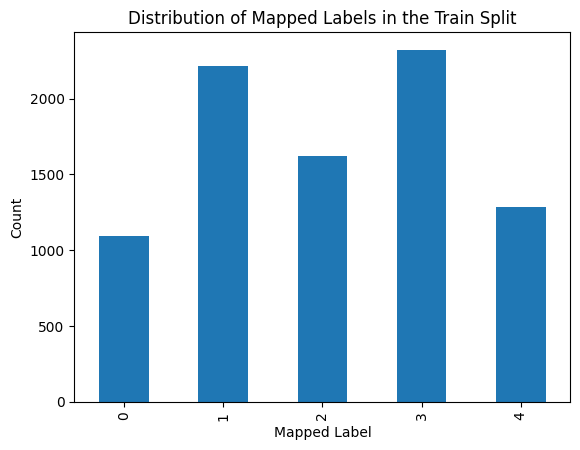

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
train_df = pd.DataFrame(sst_dataset['train']) #convert the 'train' split to a Pandas DataFrame

# Plot the distribution of mapped labels in the 'train' split
train_df['mapped_label'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Mapped Labels in the Train Split')
plt.xlabel('Mapped Label')
plt.ylabel('Count')
plt.show()

In [8]:
#print first few rows of the 'train' split to see the transformed data
print(train_df.head())

#to ensure correct mapping
print("Unique values in mapped_labels = ",train_df['mapped_label'].unique())

#check for missing values in the 'mapped_label' column of the 'train' split
print("Missing = ",train_df['mapped_label'].isnull().sum())


                                            sentence  \
0  The Rock is destined to be the 21st Century 's...   
1  The gorgeously elaborate continuation of `` Th...   
2  Singer\/composer Bryan Adams contributes a sle...   
3  You 'd think by now America would have had eno...   
4               Yet the act is still charming here .   

                                              tokens  mapped_label  
0  The|Rock|is|destined|to|be|the|21st|Century|'s...             3  
1  The|gorgeously|elaborate|continuation|of|``|Th...             4  
2  Singer\/composer|Bryan|Adams|contributes|a|sle...             3  
3  You|'d|think|by|now|America|would|have|had|eno...             2  
4               Yet|the|act|is|still|charming|here|.             3  
Unique values in mapped_labels =  [3 4 2 1 0]
Missing =  0


## Naive Bayes


$\textbf{Equation}$


$$\log(P(C_k)) = \log\left(\frac{{\text{Number of samples belonging to class $k$ } }}{{\text{Total number of samples}}}\right)$$

This function is essential for initializing the Naive Bayes classifier and obtaining the class log priors necessary for classification.

In [9]:
def train_naive_bayes(D, C):
    Ndoc = len(D)   #total number of documents in training dataset D
    Nc = np.array([np.sum(D['mapped_label'] == c) for c in C]) #calculates no. of documents in D that belong to each class in C
    logprior = np.log(Nc / Ndoc) #calculating prior probability of each class

    #building vocabulary of D
    V = set()
    for doc in D['sentence']:
        V.update(doc.split())  #adding to V so it has unique words
    V = list(V) #converting to list

    #calculating P(w|c) terms
    bigdoc = {}  #new dictionary
    for c in C:
        bigdoc[c] = ' '.join(D[D['mapped_label'] == c]['sentence']).split() #concatenate sentences of documents belonging to each class and split them into words

    #calculating frequency of each word in vocabulary for each class and store counts in a 2D NumPy array count
    count = np.zeros((len(V), len(C)))
    for i, word in enumerate(V):
        for j, c in enumerate(C):
            count[i, j] = bigdoc[c].count(word)

    #calculate log likelihoods of each word given each class
    #using Laplace smoothing to avoid zero probabilities
    loglikelihood = np.log((count + 1) / (np.sum(count, axis=0, keepdims=True) + len(V)))

    return logprior, loglikelihood, V

def test_naive_bayes(testdoc, logprior, loglikelihood, C, V):
    sum_ = np.zeros(len(C))  # to store log probabilities of each class for the given testdoc
    for c in C:
        sum_[c] = logprior[c]
        for word in testdoc.split():
            if word in V:  #if present in vocab
                sum_[c] += loglikelihood[V.index(word), c]

    return np.argmax(sum_) #returns index of the class with the highest log probability (indicating predicted class for the testdoc)

#list with the classes we have (aka labels)
C = [0, 1, 2, 3, 4]

#Trainingg
logprior, loglikelihood, V = train_naive_bayes(train_df, C)

#Testingg
correct = 0
total = len(test_df)
for i in range(total):
    predicted_label = test_naive_bayes(test_df.iloc[i]['sentence'], logprior, loglikelihood, C, V)
    if predicted_label == test_df.iloc[i]['mapped_label']:
        correct += 1

accuracy = correct / total
print("Accuracy when splitting sentence:", accuracy)


Accuracy when splitting sentence: 0.39683257918552034


#####same thing but with existing tokens in dataset not spliting the sentence

In [10]:
def train_naive_bayes1(D, C):
    #calculate P(c) terms
    Ndoc = len(D)
    Nc = np.array([np.sum(D['mapped_label'] == c) for c in C])
    logprior = np.log(Nc / Ndoc)

    # building vocab with existing tokens in dataset
    V = set()
    for tokens in D['tokens']:
        V.update(tokens)
    V = list(V)

    #calculate P(w|c) terms
    bigdoc = {}
    for c in C:
        bigdoc[c] = [token for tokens in D[D['mapped_label'] == c]['tokens'] for token in tokens]

    count = np.zeros((len(V), len(C)))
    for i, word in enumerate(V):
        for j, c in enumerate(C):
            count[i, j] = bigdoc[c].count(word)

    loglikelihood = np.log((count + 1) / (np.sum(count, axis=0, keepdims=True) + len(V)))

    return logprior, loglikelihood, V

def test_naive_bayes1(testdoc, logprior, loglikelihood, C, V):
    sum_ = np.zeros(len(C))
    for c in C:
        sum_[c] = logprior[c]
        for word in testdoc:
            if word in V:
                sum_[c] += loglikelihood[V.index(word), c]

    return np.argmax(sum_)

#classes
C = [0, 1, 2, 3, 4]

logprior, loglikelihood, V = train_naive_bayes1(train_df, C)

correct = 0
total = len(test_df)
for i in range(total):
    predicted_label = test_naive_bayes1(test_df.iloc[i]['tokens'], logprior, loglikelihood, C, V)
    if predicted_label == test_df.iloc[i]['mapped_label']:
        correct += 1

accuracy = correct / total
print("Accuracy with existing tokens in dataset:", accuracy)


Accuracy with existing tokens in dataset: 0.2864253393665158


####Metrics and comparison with sklearn

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#create pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB(alpha=1.0))  # Alpha parameter for Laplace smoothing
    ])

#Train pipeline
pipeline.fit(train_df['sentence'], train_df['mapped_label'])


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [13]:
#making predictions
predictions_sklearn = pipeline.predict(test_df['sentence'])

accuracy_sklearn = accuracy_score(test_df['mapped_label'], predictions_sklearn)
print("Accuracy (scikit-learn):", accuracy_sklearn)


Accuracy (scikit-learn): 0.4090497737556561


In [14]:
#  function to make the Confusion Matrix
def confusion_matrix_numpy(y_true, y_pred, num_classes):
    confusion_mat = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        confusion_mat[true][pred] += 1
    return confusion_mat

conf_matrix_numpy = confusion_matrix_numpy(test_df['mapped_label'], predictions_sklearn, len(C))
print("Confusion Matrix (only using numpy):\n", conf_matrix_numpy)

# Precision, Recall, and F1 score per class
def precision_recall_f1_numpy(conf_matrix):
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
    recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    f1 = 2 * (precision * recall) / (precision + recall)
    return precision, recall, f1

precision_numpy, recall_numpy, f1_numpy = precision_recall_f1_numpy(conf_matrix_numpy)
print("Precision:", precision_numpy)
print("Recall:", recall_numpy)
print("F1 Score:", f1_numpy)

# Macro-averaged Precision, Recall, and F1 score
def macro_averaged_metrics_numpy(precision, recall, f1):
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1 = np.mean(f1)
    return macro_precision, macro_recall, macro_f1

precision_macro_numpy, recall_macro_numpy, f1_macro_numpy = macro_averaged_metrics_numpy(precision_numpy, recall_numpy, f1_numpy)
print("Macro-averaged Precision:", precision_macro_numpy)
print("Macro-averaged Recall:", recall_macro_numpy)
print("Macro-averaged F1 Score:", f1_macro_numpy)


Confusion Matrix (only using numpy):
 [[ 28 200  10  41   0]
 [ 22 415  57 127  12]
 [  8 154  34 181  12]
 [  2  88  39 340  41]
 [  2  39  12 259  87]]
Precision: [0.4516129  0.46316964 0.22368421 0.35864979 0.57236842]
Recall: [0.10035842 0.65560821 0.0874036  0.66666667 0.21804511]
F1 Score: [0.16422287 0.54283846 0.12569316 0.46639232 0.31578947]
Macro-averaged Precision: 0.41389699333828645
Macro-averaged Recall: 0.3456164032418666
Macro-averaged F1 Score: 0.3229872566299008


##### better representation (for us)

In [15]:
#create DataFrame for precision, recall, and F1 score
metrics_df = pd.DataFrame({
    'Precision': precision_numpy,
    'Recall': recall_numpy,
    'F1 Score': f1_numpy
}, index=C)  # Assuming C contains the class labels


# create DataFrame for macro-averaged precision, recall, and F1 score
macro_metrics_df = pd.DataFrame({
    'Precision': [precision_macro_numpy],
    'Recall': [recall_macro_numpy],
    'F1 Score': [f1_macro_numpy]
})

print("Metrics per class (scikit-learn):\n", metrics_df)
print("-------------------------------------")
print("Macro-averaged Metrics (scikit-learn):\n", macro_metrics_df)


Metrics per class (scikit-learn):
    Precision    Recall  F1 Score
0   0.451613  0.100358  0.164223
1   0.463170  0.655608  0.542838
2   0.223684  0.087404  0.125693
3   0.358650  0.666667  0.466392
4   0.572368  0.218045  0.315789
-------------------------------------
Macro-averaged Metrics (scikit-learn):
    Precision    Recall  F1 Score
0   0.413897  0.345616  0.322987


# Logistic regression

BiGramClass:

```
 we implimented the three steps in one class to help us during the testing phase
```



In [ ]:

train_dataset = sst_dataset['train']
class BiGramLogisticRegression:

    def __init__(self, learning_rate=0.001, num_epochs=100):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.vocab = None
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_params(self, num_features):
        self.weights = np.random.randn(num_features)
        self.bias = 0

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-10
        return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))


#the preprocessing bi-gram set
    def preprocess_and_create_vocab(self, data):
        sentences = data['sentence']
        tokens = data['tokens']

        word_bi_grams = []
        for sentence_tokens in tokens:
            bi_grams = [(sentence_tokens[i], sentence_tokens[i + 1]) for i in range(len(sentence_tokens) - 1)]
            word_bi_grams.extend(bi_grams)

        self.vocab = list(set(word_bi_grams))

#creating a vector of 1 if bigram exists in dataset else 0
    def create_feature_vector(self, sentence_tokens):
        feature_vector = np.zeros(len(self.vocab))
        for i in range(len(sentence_tokens) - 1):
            bi_gram = (sentence_tokens[i], sentence_tokens[i + 1])
            if bi_gram in self.vocab:
                feature_vector[self.vocab.index(bi_gram)] = 1
        return feature_vector

    def fit(self, data):
        self.preprocess_and_create_vocab(data)
        X_train = np.array([self.create_feature_vector(tokens) for tokens in data['tokens']])
        y_train = np.array(data['mapped_label'])

        num_samples, num_features = X_train.shape
        self.initialize_params(num_features)

        for epoch in range(self.num_epochs):
            # Forward pass
            logits = np.dot(X_train, self.weights) + self.bias
            y_pred = self.sigmoid(logits)

            # Compute loss
            loss = self.compute_loss(y_train, y_pred)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X_train.T, (y_pred - y_train))
            db = (1 / num_samples) * np.sum(y_pred - y_train)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, data):
        X_test = np.array([self.create_feature_vector(tokens) for tokens in data['tokens']])
        logits = np.dot(X_test, self.weights) + self.bias
        y_pred = self.sigmoid(logits)

        # Define class boundaries
        thresholds = [0.2, 0.4, 0.6, 0.8]

        # Classify based on thresholds
        predictions = np.zeros(len(y_pred), dtype=int)
        for i, pred in enumerate(y_pred):
            if pred < thresholds[0]:
                predictions[i] = 0
            elif pred < thresholds[1]:
                predictions[i] = 1
            elif pred < thresholds[2]:
                predictions[i] = 2
            elif pred < thresholds[3]:
                predictions[i] = 3
            else:
                predictions[i] = 4  # For values >= 0.8
        return predictions

# Initialize the logistic regression model
model = BiGramLogisticRegression()

# Train the model on the training data
model.fit(train_dataset)

Epoch 0, Loss: 12.950020654120213
Epoch 10, Loss: 12.031308075029264
Epoch 20, Loss: 11.130034776300405
Epoch 30, Loss: 10.2476306078688
Epoch 40, Loss: 9.385346623719448
Epoch 50, Loss: 8.544243369480888
Epoch 60, Loss: 7.725147219465302
Epoch 70, Loss: 6.928662171945825
Epoch 80, Loss: 6.155199294865913
Epoch 90, Loss: 5.404974801265081


In [ ]:

test_predictions= model.predict(sst_dataset['test'])

In [ ]:
def confusion_matrix(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    matrix = np.zeros((num_classes, num_classes))

    for i in range(len(y_true)):
        true_label = y_true[i]
        predicted_label = y_pred[i]
        matrix[true_label][predicted_label] += 1

    return matrix



conf_matrix = confusion_matrix(sst_dataset['test']['mapped_label'], test_predictions)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[151.  16.  23.  13.  76.]
 [321.  44.  38.  32. 198.]
 [195.  22.  19.  20. 133.]
 [251.  37.  29.  32. 161.]
 [222.  25.  23.  18. 111.]]


In [ ]:
def precision(conf_matrix):
    true_positives = np.diag(conf_matrix)
    false_positives = np.sum(conf_matrix, axis=0) - true_positives
    with np.errstate(divide='ignore', invalid='ignore'):
        precision_values = true_positives / (true_positives + false_positives)
        precision_values[np.isnan(precision_values)] = 0  # Replace NaN values with zero
    return precision_values

def recall(conf_matrix):
    true_positives = np.diag(conf_matrix)
    false_negatives = np.sum(conf_matrix, axis=1) - true_positives
    return true_positives / (true_positives + false_negatives)

def accuracy(conf_matrix):
    correct_predictions = np.sum(np.diag(conf_matrix))
    total_predictions = np.sum(conf_matrix)
    return correct_predictions / total_predictions

def f1_score(precision, recall):
    with np.errstate(divide='ignore', invalid='ignore'):
        f1_values = 2 * (precision * recall) / (precision + recall)
        f1_values[np.isnan(f1_values)] = 0  # Replace NaN values with zero
    return f1_values



precisions = precision(conf_matrix)
recalls = recall(conf_matrix)
accur = accuracy(conf_matrix)
f1_scores = f1_score(precisions, recalls)
print("\nPrecision:", precisions)
print("Recall:", recalls)
print("Accuracy:", accur)
print("F1 Score:", f1_scores)


Precision: [0.13245614 0.30555556 0.14393939 0.27826087 0.1634757 ]
Recall: [0.54121864 0.06951027 0.04884319 0.0627451  0.27819549]
Accuracy: 0.16153846153846155
F1 Score: [0.21282593 0.11325611 0.07293666 0.1024     0.20593692]


**SKLEARN**

---






In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
test_data=sst_dataset['test']
# Preprocess the text data
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Using word bi-grams
X_train_vectorized = vectorizer.fit_transform(train_dataset['sentence'])
X_test_vectorized = vectorizer.transform(test_data['sentence'])

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, train_dataset['mapped_label'])

# Predict labels for the test dataset
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
conf_matrix = confusion_matrix(test_data['mapped_label'], y_pred)
accuracy = accuracy_score(test_data['mapped_label'], y_pred)
precision = precision_score(test_data['mapped_label'], y_pred, average=None)
recall = recall_score(test_data['mapped_label'], y_pred, average=None)
f1 = f1_score(test_data['mapped_label'], y_pred, average=None)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Confusion Matrix:
[[ 36 136  41  58   8]
 [ 38 332  97 148  18]
 [ 18 152  57 142  20]
 [  4 142  49 274  41]
 [ 11  77  35 192  84]]

Precision: [0.3364486  0.39570918 0.20430108 0.33660934 0.49122807]
Recall: [0.12903226 0.52448657 0.14652956 0.5372549  0.21052632]
Accuracy: 0.35429864253393667
F1 Score: [0.1865285  0.45108696 0.17065868 0.41389728 0.29473684]


###Logistic regression with SGD classifier

In [18]:
from sklearn.linear_model import SGDClassifier
X = train_df['sentence']
y = train_df['mapped_label']


X_test = sst_dataset['test']['sentence']
y_test = sst_dataset['test']['mapped_label']
# Convert continuous values to binary labels
y_train = (y_train >= 0.5).astype(int)
y_test = (y_test >= 0.5).astype(int)

# Create a pipeline with CountVectorizer and SGDClassifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(2, 2))),
    ('classifier', SGDClassifier(loss='log_loss', max_iter=1000))  # Use SGD with logistic regression
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



NameError: name 'y_train' is not defined

SECOND TRY:

#### Feature Representation

In [ ]:
def sentence_to_binary_vector(sentence, unique_bigrams):
    words = sentence.split()
    sentence_bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    binary_vector = [1 if bigram in sentence_bigrams else 0 for bigram in unique_bigrams]
    return binary_vector

# Example usage:
sentences = ["I love this movie very much", "This movie is terrible", "This movie is amazing"]
labels = [1, 0, 1]  # Example labels

# Extract word bi-grams and labels
word_bigrams, bigram_labels = extract_word_bigrams_with_labels(sentences, labels)

# Extract unique word bi-grams occurring once with labels
unique_bigrams_once, unique_labels_once = extract_features(word_bigrams, bigram_labels)
print(unique_bigrams_once)
# Represent each sentence with a binary vector
binary_vectors = [sentence_to_binary_vector(sentence, unique_bigrams_once) for sentence in sentences]

# Print the result
for sentence, binary_vector in zip(sentences, binary_vectors):
    print(f"Sentence: {sentence}")
    print(f"Binary Vector: {binary_vector}")


{('is', 'terrible'), ('movie', 'very'), ('is', 'amazing'), ('very', 'much'), ('love', 'this'), ('I', 'love')}
Sentence: I love this movie very much
Binary Vector: [0, 1, 0, 1, 1, 1]
Sentence: This movie is terrible
Binary Vector: [1, 0, 0, 0, 0, 0]
Sentence: This movie is amazing
Binary Vector: [0, 0, 1, 0, 0, 0]


In [ ]:
def extract_word_bigrams_with_labels(sentences, labels):
    word_bigrams = []
    bigram_labels = []

    for sentence, label in zip(sentences, labels):
        words = sentence.split()  # Split sentence into words
        sentence_bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
        word_bigrams.extend(sentence_bigrams)
        bigram_labels.extend([label] * len(sentence_bigrams))

    return word_bigrams, bigram_labels

def extract_features(word_bigrams, bigram_labels):
    bi_gram_count = {}
    unique_bigrams = set()
    unique_labels = []

    for bigram, label in zip(word_bigrams, bigram_labels):
        bigram_lower = (bigram[0].lower(), bigram[1].lower())
        if bigram_lower not in bi_gram_count:
            count = 0
            for sentence_bigram in word_bigrams:
                sentence_bigram_lower = (sentence_bigram[0].lower(), sentence_bigram[1].lower())
                if bigram_lower == sentence_bigram_lower:
                    count += 1
            bi_gram_count[bigram_lower] = count

            if count == 1:
                unique_bigrams.add(bigram)
                unique_labels.append(label)

    return unique_bigrams, unique_labels

def sentence_to_binary_vector(sentence, unique_bigrams):
    words = sentence.split()
    sentence_bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    binary_vector = [1 if bigram in sentence_bigrams else 0 for bigram in unique_bigrams]
    return binary_vector





In [ ]:
from collections import Counter

def extract_word_bigrams_with_labels(sentences, labels):
    word_bigrams = []
    bigram_labels = []

    for sentence, label in zip(sentences, labels):
        words = sentence.split()
        sentence_bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
        word_bigrams.extend(sentence_bigrams)
        bigram_labels.extend([label] * len(sentence_bigrams))

    return word_bigrams, bigram_labels

def extract_features(word_bigrams, bigram_labels):
    bigram_counter = Counter(word_bigrams)
    unique_bigrams = {bigram for bigram, count in bigram_counter.items() if count == 1}
    unique_labels = [label for bigram, label in zip(word_bigrams, bigram_labels) if bigram in unique_bigrams]

    return unique_bigrams, unique_labels

def sentence_to_binary_vector(sentence, unique_bigrams):
    words = sentence.split()
    sentence_bigrams = {(words[i], words[i+1]) for i in range(len(words)-1)}
    binary_vector = [1 if bigram in sentence_bigrams else 0 for bigram in unique_bigrams]
    return binary_vector


In [ ]:
sentences = sst_dataset['train']['sentence']
labels = sst_dataset['train']['mapped_label']

word_bigrams, bigram_labels = extract_word_bigrams_with_labels(sentences, labels)
unique_bigrams, unique_labels = extract_features(word_bigrams, bigram_labels)
binary_vectors = []
for sentence in sentences:
    # Convert the sentence into a binary vector
    binary_vector = sentence_to_binary_vector(sentence, unique_bigrams)
    # Append the binary vector to the list
    binary_vectors.append(binary_vector)

In [ ]:
testsentences = sst_dataset['test']['sentence']
sbinary_vectors = []
for sentence in testsentences:
    # Convert the sentence into a binary vector
    binary_vector = sentence_to_binary_vector(sentence, unique_bigrams)
    # Append the binary vector to the list
    sbinary_vectors.append(binary_vector)

In [ ]:
import numpy as np
print(len(binary_vectors))
print(len(binary_vectors[0]))

print(len(unique_labels))
unique_labels_array = np.array(unique_labels)

# Reshape the array to be a row
unique_labels_row = unique_labels_array.reshape(1, -1)

# Printing the shape of the resulting row
print(unique_labels_row.shape)
concatenated_array = np.concatenate(binary_vectors)
print(concatenated_array.shape)

print(unique_labels_row)

8544
70416
70416
(1, 70416)
(601634304,)
[[3 3 3 ... 0 0 1]]


In [ ]:

print(len(binary_vectors[1]))

70416


In [ ]:
import cupy as cp


class LogisticRegression:
    def __init__(self, learning_rate=0.0001, num_epochs=1000):
        self.learning_rate = cp.float32(learning_rate)
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def softmax(self, z):
        exp_z = cp.exp(z - cp.amax(z, axis=1, keepdims=True), dtype=cp.float32)
        return exp_z / cp.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = len(cp.unique(y))

        self.weights = cp.random.rand(num_features, num_classes).astype(cp.float32)
        self.bias = cp.zeros((1, num_classes), dtype=cp.float32)

        y_one_hot = cp.zeros((num_samples, num_classes), dtype=cp.float32)
        y_one_hot[cp.arange(num_samples), y] = 1

        alpha = self.learning_rate
        batch_size = 32

        for epoch in range(self.num_epochs):
            # Shuffle the data
            indices = cp.arange(num_samples)
            cp.random.shuffle(indices)

            epoch_loss = 0.0  # Initialize loss for the epoch

            for i in range(0, num_samples, batch_size):
                # Select the indices for the current batch
                batch_indices = indices[i:i+batch_size]
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]

                # Forward pass
                logits = cp.dot(X_batch, self.weights) + self.bias
                probs = self.softmax(logits)

                # Compute loss
                loss = -cp.mean(y_one_hot[batch_indices] * cp.log(probs))
                epoch_loss += loss  # Accumulate loss for the epoch

                # Compute gradients
                dw = cp.dot(X_batch.T, (probs - y_one_hot[batch_indices]))
                db = cp.sum(probs - y_one_hot[batch_indices], axis=0, keepdims=True)

                # Update weights and bias using gradient descent
                self.weights -= alpha * dw
                self.bias -= alpha * db

            # Calculate average loss for the epoch
            epoch_loss /= (num_samples // batch_size)

    def predict(self, X):
        logits = cp.dot(X, self.weights) + self.bias
        probs = self.softmax(logits)
        return cp.argmax(probs, axis=1)


In [ ]:
num_classes = len(np.unique(Y_train))

# then we convert y to one-hot encoding using np.eye
y_one_hot = np.eye(num_classes)[Y_train]

In [ ]:
#initialize parameters
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]
weights = np.zeros((num_features, num_classes))  #weights matrix
bias = np.zeros(num_classes)  #bias

learning_rate = 0.1
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    # Forward propagation
    logits = np.dot(X_train, weights) + bias
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    # Loss calculation
    one_hot_y = np.zeros((len(y_train), num_classes))
    one_hot_y[np.arange(len(y_train)), y_train] = 1
    loss = -np.sum(one_hot_y * np.log(probs)) / len(y_train)

    # Backpropagation
    grad_logits = probs - one_hot_y
    grad_weights = np.dot(X_train.T, grad_logits)
    grad_bias = np.sum(grad_logits, axis=0)

    # Parameter update
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# After training, you can use the weights and bias terms for inference


NameError: name 'y_train' is not defined

In [ ]:
#instance of the LogisticRegression class
model = LogisticRegression()
#converting lists to NumPy arrays
X_train = np.array(binary_vectors)
Y_train = np.array(unique_labels)

num_classes = len(np.unique(Y_train))

# then we convert y to one-hot encoding using np.eye
y_one_hot = np.eye(num_classes)[Y_train]

model.fit(X_train, Y_train) #fitting the model to training data


ValueError: operands could not be broadcast together with shapes(8544,) (70416,)

In [ ]:
predicted= model.predict(sbinary_vectors)


In [ ]:
from tqdm.notebook import tqdm

class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10, batch_size=32):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.batch_size = batch_size
        self.weights = None

    def softmax(self, z):
        e_z = np.exp(z - np.max(z))
        return e_z / e_z.sum(axis=1, keepdims=True)

    def train(self, X, y):
        X = np.array(X) if isinstance(X, list) else X
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        # 1. Initialize weights
        self.weights = np.zeros((num_features, num_classes))

        # 2. Gradient descent loop
        for i in tqdm(range(self.num_iterations)):
            indices = np.random.choice(num_samples, self.batch_size)  # select random batch indices
            X_batch, y_batch = X[indices], y[indices]  # get batches
            linear_model = np.dot(X_batch, self.weights)
            y_predicted = self.softmax(linear_model)

            # 3. Compute gradients
            y_actual = np.zeros(y_predicted.shape)
            y_actual[np.arange(self.batch_size), y_batch] = 1
            gradient = (1 / self.batch_size) * np.dot(X_batch.T, (y_predicted - y_actual))

            # 4. Update weights
            self.weights -= self.learning_rate * gradient

            # 5. Delete batch from memory
            del X_batch, y_batch

    def predict(self, X):
        linear_model = np.dot(X, self.weights)
        y_predicted = self.softmax(linear_model)
        return np.argmax(y_predicted, axis=1)


softmax_model = SoftmaxRegression()

softmax_model.train(binary_vectors, unique_labels)



  0%|          | 0/10 [00:00<?, ?it/s]

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
def accuracy(true_labels, predicted_labels):
    correct = np.sum(true_labels == predicted_labels)
    total = len(true_labels)
    return correct / total

# Example usage:
true_labels = sst_dataset['train']['mapped_label']
predicted_labels = test_predictions

num_classes = 5


acc = accuracy(true_labels, predicted_labels)
print("Accuracy:", acc)


Accuracy: 0.2723548689138577


In [ ]:
print(true_labels)

[3, 4, 3, 2, 3, 4, 4, 3, 4, 3, 4, 2, 4, 2, 4, 3, 3, 2, 4, 3, 4, 3, 2, 4, 2, 2, 4, 3, 4, 1, 4, 3, 2, 3, 4, 3, 3, 3, 2, 3, 3, 4, 2, 3, 2, 0, 3, 3, 1, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 2, 3, 3, 3, 1, 1, 4, 3, 4, 4, 3, 2, 1, 3, 2, 2, 3, 4, 4, 4, 4, 3, 2, 4, 3, 3, 4, 4, 3, 4, 3, 3, 1, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 2, 3, 2, 3, 3, 3, 4, 1, 2, 2, 2, 4, 3, 3, 3, 3, 2, 4, 4, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 2, 4, 3, 2, 1, 3, 2, 3, 3, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 4, 3, 1, 2, 4, 3, 3, 1, 3, 4, 4, 3, 3, 3, 3, 3, 1, 4, 4, 2, 4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 4, 2, 3, 4, 2, 4, 3, 1, 2, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 2, 4, 2, 3, 4, 2, 2, 4, 3, 3, 2, 3, 4, 3, 3, 4, 3, 4, 3, 3, 2, 4, 1, 4, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 2, 4, 4, 3, 2, 1, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 2, 1, 3, 2, 4, 4, 3, 4, 3, 3, 

###Metrics

In [ ]:
num_classes = 5
cm = confusion_matrix_numpy(true_labels, predicted_labels, num_classes)
print(cm)

precision_numpy, recall_numpy, f1_numpy = precision_recall_f1_numpy(conf_matrix_numpy)

precision_macro_numpy, recall_macro_numpy, f1_macro_numpy = macro_averaged_metrics_numpy(precision_numpy, recall_numpy, f1_numpy)

#print metrics
for i in range(num_classes):
    print(f"Class {i}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1-Score={f1_score[i]:.4f}")

print(f"Macro-averaged Precision: {precision_macro_numpy:.4f}")
print(f"Macro-averaged Recall: {recall_macro_numpy:.4f}")
print(f"Macro-averaged F1-Score: {f1_macro_numpy:.4f}")


[[  0  96   0 183   0]
 [  0 238   0 395   0]
 [  0  94   0 295   0]
 [  0  84   0 426   0]
 [  0  47   0 352   0]]
Class 0: Precision=0.0000, Recall=0.0000, F1-Score=0.0000
Class 1: Precision=0.4258, Recall=0.3760, F1-Score=0.3993
Class 2: Precision=0.0000, Recall=0.0000, F1-Score=0.0000
Class 3: Precision=0.2580, Recall=0.8353, F1-Score=0.3943
Class 4: Precision=0.0000, Recall=0.0000, F1-Score=0.0000
Macro-averaged Precision: 0.1368
Macro-averaged Recall: 0.2423
Macro-averaged F1-Score: 0.1587
